In [12]:
%cd oopsie/OASIS

/Users/dynerman/dev/spikefinder
/Users/dynerman/dev/spikefinder/oopsie/OASIS


In [14]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_dir = '../../data/train/'
datasets = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
calcium_trains = {}
spikes_trains = {}
for dataset in datasets:
    calcium_trains[dataset] = pd.read_csv(train_dir + dataset + '.train.calcium.csv')
    spikes_trains[dataset] = pd.read_csv(train_dir + dataset + '.train.spikes.csv')

In [35]:
from scipy.signal import butter, lfilter
b, a = butter(5, 0.05)

def low_pass_butter(signal):
    signal[np.where(np.isnan(signal))] = 0
    return lfilter(b,a, signal)

In [15]:
from functions import deconvolve

In [41]:
predicted_spikes = {}
for dataset in ['1','2', '3', '4', '10']:
    predicted_spikes[dataset] = {}
    for run in calcium_trains[dataset]:
        filtered_calcium = low_pass_butter(calcium_trains[dataset][run].values)
        predicted_spikes[dataset][run] = deconvolve(calcium_trains[dataset][run].values - filtered_calcium)[1]
    print dataset, " corr: ", np.median(score(predicted_spikes[dataset],spikes_trains[dataset], method='corr'))

1  corr:  0.360552246325
2  corr:  0.31586573644
3  corr:  0.393841025906
4  corr:  0.206705242337
10  corr:  0.633938418815


In [42]:
predicted_spikes = {}
for dataset in ['1','2', '3', '4', '10']:
    predicted_spikes[dataset] = {}
    for run in calcium_trains[dataset]:
        predicted_spikes[dataset][run] = deconvolve(calcium_trains[dataset][run].values)[1]
    print dataset, " corr: ", np.median(score(predicted_spikes[dataset],spikes_trains[dataset], method='corr'))

1  corr:  0.296139208961
2  corr:  0.280102805483
3  corr:  0.329640334518
4  corr:  0.249715094223
10  corr:  0.561227385595


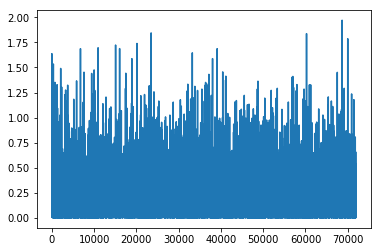

In [18]:

c,s,b,g,lam = deconvolve(signal.values - slp)
c2,s2,b2,g2,lam2 = deconvolve(signal.values)

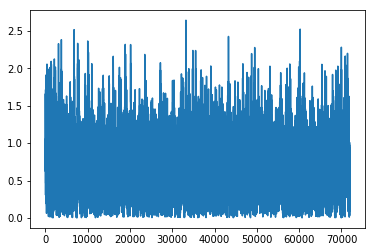

In [17]:
plt.plot(c2)

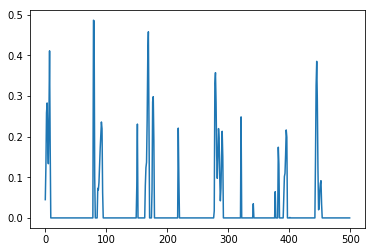

In [51]:
plt.plot(s[10000:10500])

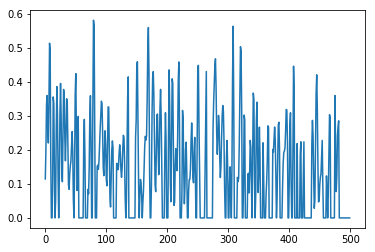

In [19]:
plt.plot(s2[10000:10500])